In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import scipy as sp

In [ ]:
from scipy import stats

# Measuring Central Tendency

mean
*   tidak toleran terhadap outlier
*   tidak cocok untuk data diskrit (example: jumlah kucing)

median
*   sangat toleran terhadap outlier
*   perlu juga memperhatikan nila data pada persentil ke-25 (Q1) dan persentil ke-75 (Q3), tidak hanya yang ke-50 saja.

mode
* nilai yang paling sering muncul



In [ ]:
jumlah_kucing = np.array([3,2,1,1,2,3,2,1,0,2])
np.median(jumlah_kucing)

2.0

In [ ]:
mode = stats.mode(jumlah_kucing)
print(mode)

ModeResult(mode=2, count=4)


# Measuring Dispersion

range
* perbedaan nilai maximum dan minimum
* selisih

interquartile range
* selisih antara Q3 dan Q1

variance
* besar simpangan suatu titik data dari nilai mean

standar deviation
* menghitung akar kuadrat dari variance
*  Semakin kecil nilai standard deviation, semakin kecil pula jarak antar titik data dengan nilai mean-nya sehingga bisa disimpulkan data tersebut memiliki sebaran yang sempit
* sering digunakan untuk menilai seberapa baik parameter mean dalam merepresentasikan suatu data.

In [ ]:
IQR = np.percentile(jumlah_kucing, 75) - np.percentile(jumlah_kucing, 25)
print(IQR)

1.0


In [ ]:
jumlah_kucing_series = pd.Series(jumlah_kucing)
jumlah_kucing_series.var()

0.8999999999999999

In [ ]:
jumlah_kucing_series.std()

0.9486832980505138

# Data Distribution

symmetric distribution (normal/bell curve)
* memungkinkan kita untuk membagi data menjadi dua bagian secara simetris
* memiliki nilai mean, median, serta mode yang sama dan berada di sentral distribusi data

right-skewed distribution (lebih besar di kiri)
* nilai mean > nilai median & mode

left-skewed distribution (lebih besar di kanan)
* median, mode > mean

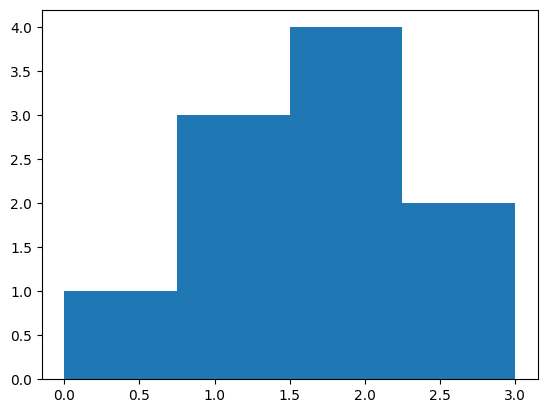

In [ ]:
import matplotlib.pyplot as plt
plt.hist(jumlah_kucing, bins=4)
plt.show()

# Measuring Asymmetric

skewness
* nilai + distribusi cenderung right-skewed
* nol menggambarkan data yang memiliki distribusi simetris sempurna
* nilai skewness negatif merepresentasikan data dengan distribusi yang cenderung left-skewed.


In [ ]:
jumlah_kucing_series.skew()

-0.2342427896421018

# Data Relationship

Data numerik
1. Correlation
    * rentang -1 hingga 1
    * nilai negatif = korelasi berlawanan
    * nilai positif = positive correlation
    * nilai 0 = no correlation

2. Covariance
    * + covar = dua feature bersesuaian
    * - covar = dua feature berlawanan
    * zero covar = tidak berkorelasi satu sama lain


In [ ]:
sample_data = {
    'name': ['John', 'Alia', 'Ananya', 'Steve', 'Ben'],
    'age': [24, 22, 23, 25, 28],
    'communication_skill_score': [85, 70, 75, 90, 90],
    'quantitative_skill_score': [80, 90, 80, 75, 70]
}

df = pd.DataFrame(sample_data)

df.corr(numeric_only=True)

,age,communication_skill_score,quantitative_skill_score
age,1.000000,0.848855,-0.922489
communication_skill_score,0.848855,1.000000,-0.890724
quantitative_skill_score,-0.922489,-0.890724,1.000000


In [ ]:
df.cov(numeric_only=True)

,age,communication_skill_score,quantitative_skill_score
age,5.30,17.75,-15.75
communication_skill_score,17.75,82.50,-60.00
quantitative_skill_score,-15.75,-60.00,55.00


# Data Wrangling

1. Data source
    * kaggle
    * UCI Maching Learning
    * Google dataset search
    * Satu Data Indonesia

In [4]:
# df = pd.read_csv("data.csv", delimiter=",")
# df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
# df = pd.read_json("data.json")
# url = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list"
# df = pd.read_html(url)[0]
# df = pd.read_xml("https://www.w3schools.com/xml/books.xml")

In [9]:
df = pd.read_xml("https://www.w3schools.com/xml/books.xml")
print(df)

   category              title                  author  year  price      cover
0   cooking   Everyday Italian     Giada De Laurentiis  2005  30.00       None
1  children       Harry Potter            J K. Rowling  2005  29.99       None
2       web  XQuery Kick Start  Vaidyanathan Nagarajan  2003  49.99       None
3       web       Learning XML             Erik T. Ray  2003  39.95  paperback


In [11]:
#library pendukung untuk mengakses database
#SQLAlchemy
import sqlalchemy as sqla

fungsi #1 untuk berinteraksi dengan database

In [14]:
#db = sqla.create_engine("sqlite://mydata.sqlite")
#pd.read_sql_table("table_name", db)

fungsi #2 untuk berinteraksi dengan database

In [ ]:
#pd.read_sql_query("SELECT * FROM table_name", db)

fungsi #3 untuk berinteraksi dengan database

In [ ]:
#pd.read_sql("SELECT * FROM table_name", db)

Primary key merupakan sebuah kolom dengan nilai unik yang merepresentasikan suatu data dalam sebuah tabel.

Foreign key merupakan kolom yang berisi primary key dari tabel lain. Ia digunakan untuk mereferensikan data dari tabel lain hingga terbentuk sebuah relationship antar tabel.

Jenis join:
- Inner = hanya nilai yang sesuai di kedua tabel
- Left = mengambil semua nilai dari tabel  kiri berserta nilai yang sesuai dengan tabel kanan
- Right = mengambil semua nilai dari tabel kanan beserta nilai yang bersesuaian dari tabel kiri
- Outer = full outer join, mengambil semua nilai, gabungan left dan right join


In [ ]:
#fungsi pandas untuk menggabungkan data = merge

product_df = pd.read_csv("product.csv")
orders_df = pd.read_csv("orders.csv")

new_order_df = pd.merge(
    left=product_df,
    right=orders_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

masalah umum yang dijumpai dalam menganalisa data (data wrangling):

* missing value
#product_df.isnull().sum()
* invalid value
#dapat diatasi dengan filtering menggunakan regex
* duplicate data
#df.duplicated().sum()
*innaccurate value
*inconsistent value
*outlier
#IQR Method, membuat nilai cut-off sebagai faktor k (nilai 1.5-3), nilai ini akan diggunakan untuk menghitung ambang batas, minimum dan maksimum. di luar angka yang telah dihitung, ditentukan sbg outlier.

#selain IQR, dapat menggunakan box plot, lebih mudah untuk mengidentifikasi outlier melalui visual

In [ ]:
import numpy as np

q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in data if x < minimum or x > maximum]

# Proses cleaning data

1. define
2. code
3. test

teknik untuk mengatasi missing value:
* dropping
products_df.dropna(axis=0, inplace=True)
* imputation
   - data kontinu, kita bisa menggunakan nilai mean, median, atau mode sebagai pengganti missing value.
   - data kategoris, kita dapat mengisi missing value dengan kategori yang paling sering muncul
   - data.age.fillna(value=data.age.mean(), inplace=True)
   - belum terlalu baik untuk data time series

* interpolation
    - menghitung titik data baru berdasarkan range data yang ada, menggunakan persamaan garis linear/polynominal
    - cocok untuk time series
    - data.close_price.interpolate(method='linear', limit_direction='forward', inplace=True)

# Teknik untuk mengatasi outlier
1. drop

df = pd.read_csv("data.csv")

Q1 = (df['TotalCharges']).quantile(0.25)
Q3 = (df['TotalCharges']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

2. imputation

selain mengisi data dengan central tendency, bisa menggunakan boundary value.

Q1 = (df['TotalCharges']).quantile(0.25)
Q3 = (df['TotalCharges']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum

df.mask(cond=kondisi_more_than, maximum, axis=1, inplace=True)
df.mask(cond=kondisi_lower_than, minimum, axis=1, inplace=True)


# Teknik untuk mengatasi data duplicate

df.drop_duplicates(inplace=True)



---



---



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [20]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [21]:
products_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/products.csv")
products_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [23]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


In [53]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [54]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [55]:
print("duplicate_data: ", customers_df.duplicated().sum())

duplicate_data:  6


In [56]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


In [29]:
orders_df.info()
orders_df.isna().sum()
print("duplicate_data: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
duplicate_data:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


In [30]:
products_df.info()
products_df.isna().sum()
print("duplicate_data: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB
duplicate_data:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


In [31]:
sales_df.info()
sales_df.isna().sum()
print("duplicate_data: ", sales_df.duplicated().sum())
sales_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB
duplicate_data:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [32]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


In [57]:
#membersihkan data duplicate dengan drop
customers_df.drop_duplicates(inplace=True)

In [58]:
print("duplicate_data: ", customers_df.duplicated().sum())

duplicate_data:  0


In [59]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [60]:
customers_df.gender.value_counts()

,count
gender,
Prefer not to say,725
Male,143
Female,115


In [61]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [62]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,0
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [63]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [64]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

<ipython-input-64-b0aaf8dd8060>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 70, inplace=True)


In [66]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

<ipython-input-66-098432afa05d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df.age.replace(customers_df.age.max(), 50, inplace=True)


In [67]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


In [68]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


In [71]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [72]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [74]:
products_df.drop_duplicates(inplace=True)

In [76]:
print("jumlah duplikat:", products_df.duplicated().sum())

jumlah duplikat: 0


In [78]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [79]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [80]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,0
